In [1]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('database_non-shows.xlsx')

In [3]:
x = data.drop('Appointment Type', axis=1)
y = data['Appointment Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
#classes
classes = [0, 1]

In [ ]:
# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha=0.0 , criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=5,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME.R", learning_rate=0.2),
RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=30,min_samples_split=2,min_samples_leaf=1,max_features=None),
DecisionTreeClassifier(ccp_alpha=0.0 , criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=5,splitter="best"),
ExtraTreesClassifier(bootstrap=False, criterion= "gini",max_depth=40 , max_features=1,min_samples_leaf=1, min_samples_split=2, n_estimators=250, random_state=789),
BaggingClassifier(RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=30,min_samples_split=2,min_samples_leaf=1,max_features=None),n_estimators=200 , max_samples=0.9, max_features=0.5, bootstrap=False),
SVC(C= 10, gamma= 0.01 , kernel= "rbf", tol=0.0001), 
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']

Train runtime: 17.63900113105774
Test runtime: 0.17200517654418945


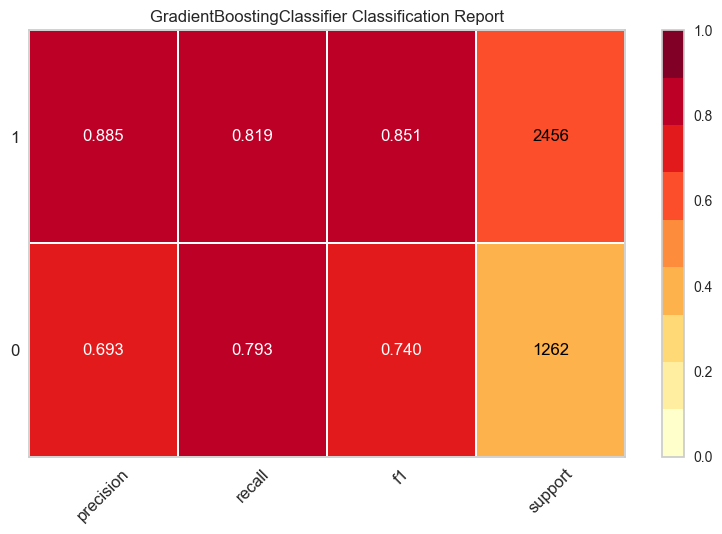

Train runtime: 37.63983392715454
Test runtime: 0.9685962200164795


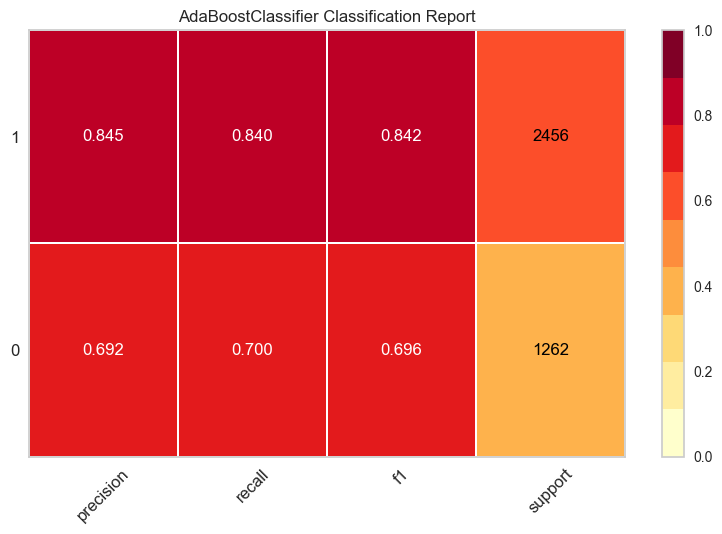

Train runtime: 31.723896026611328
Test runtime: 0.7815442085266113


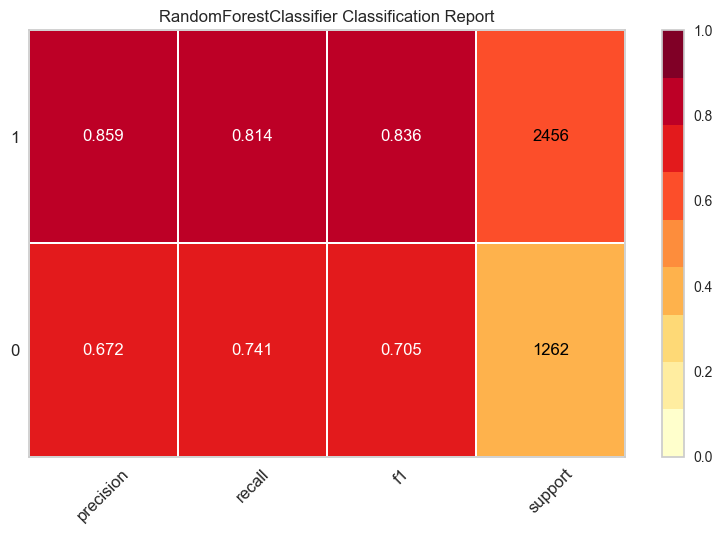

Train runtime: 0.12458682060241699
Test runtime: 0.06316375732421875


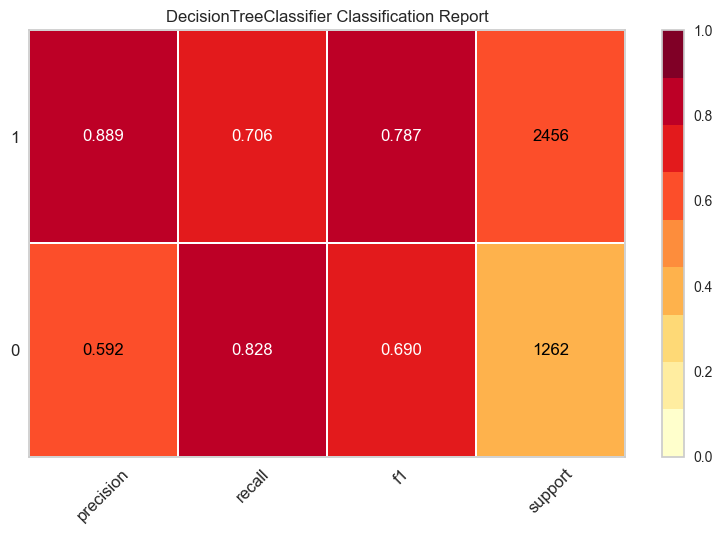

Train runtime: 10.500612735748291
Test runtime: 1.5490353107452393


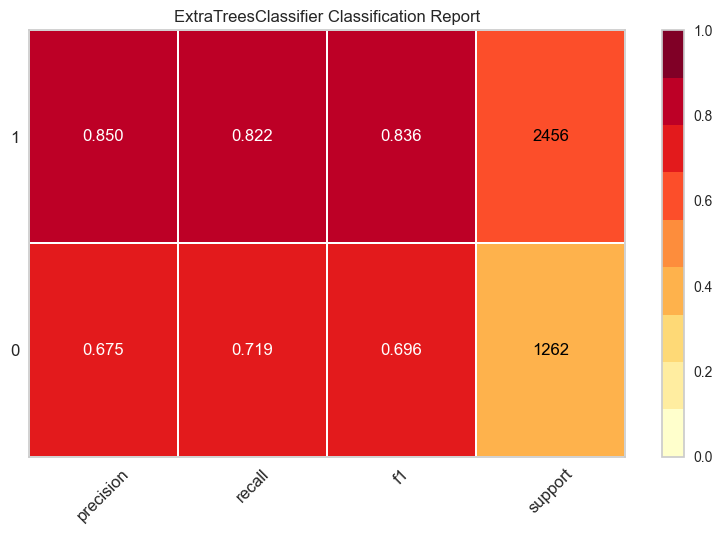

Train runtime: 5150.753437995911
Test runtime: 1618.433664560318


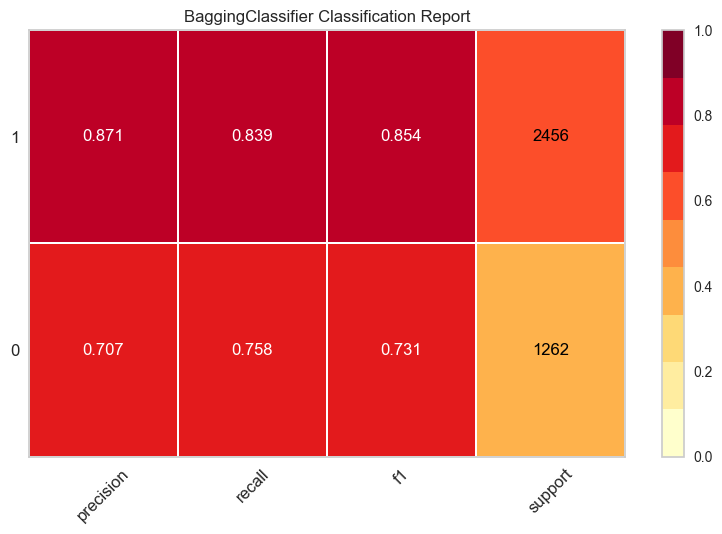

Train runtime: 306.14328169822693
Test runtime: 61.44952201843262


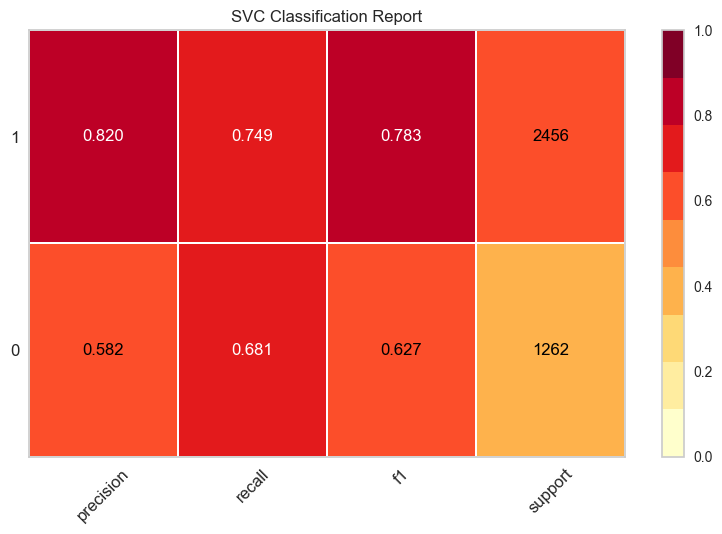

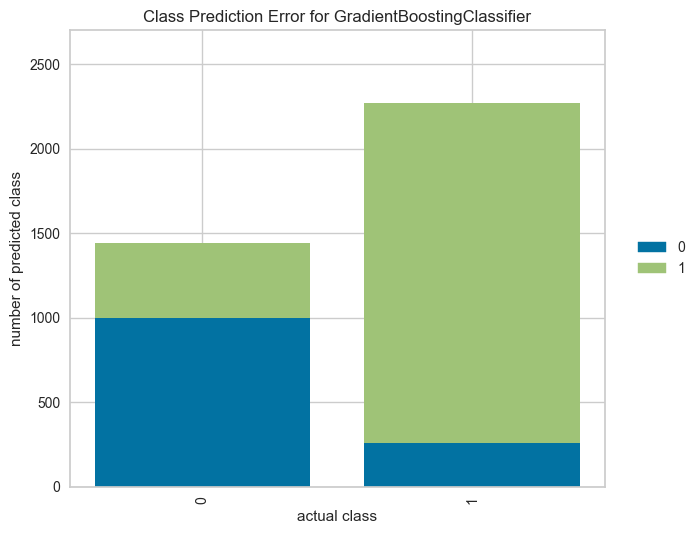

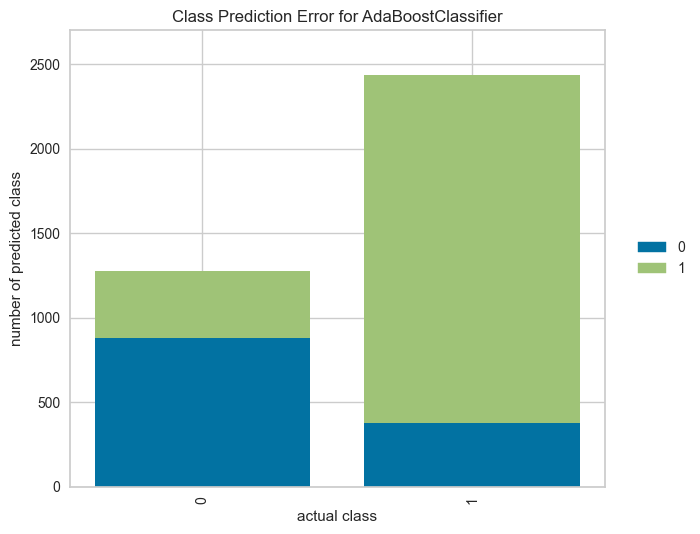

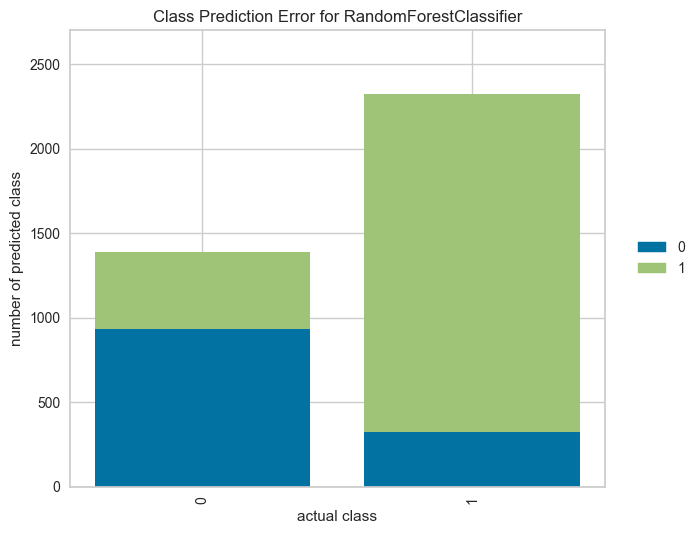

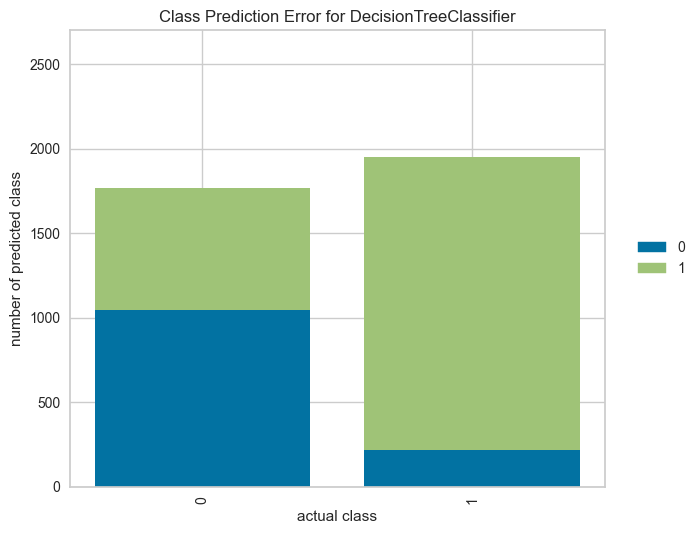

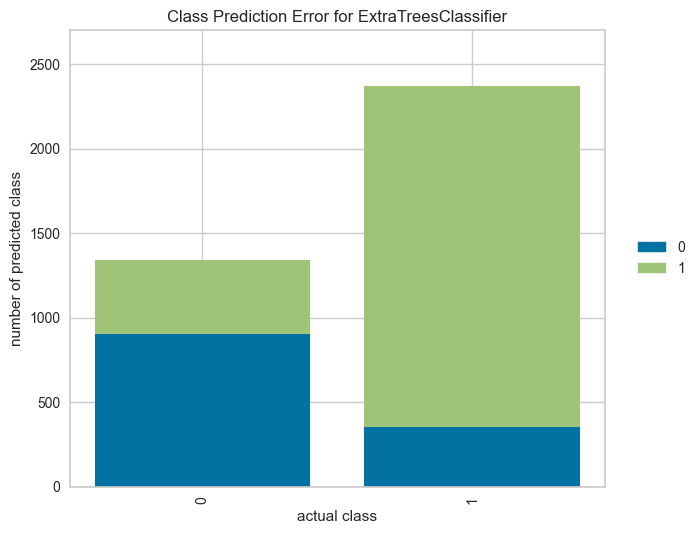

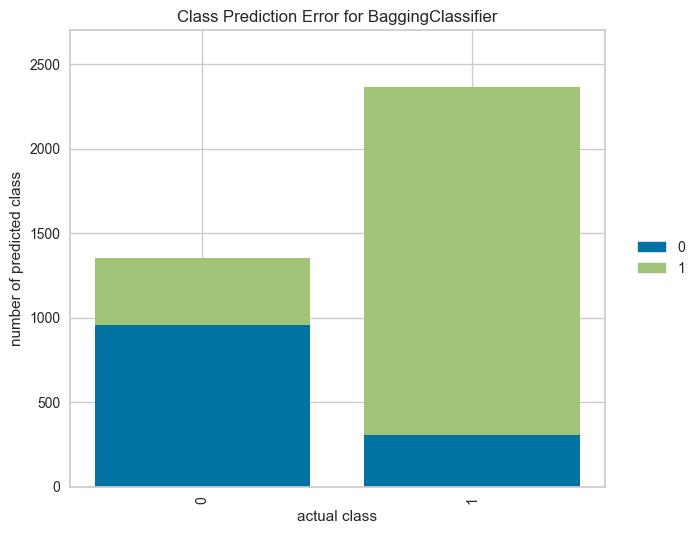

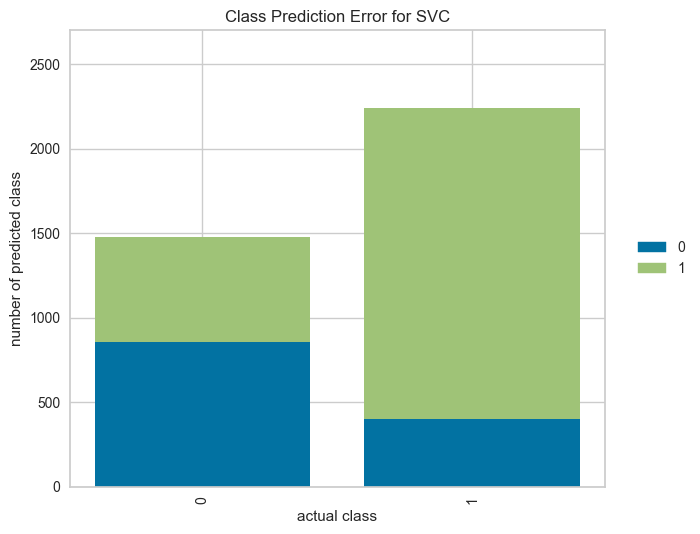

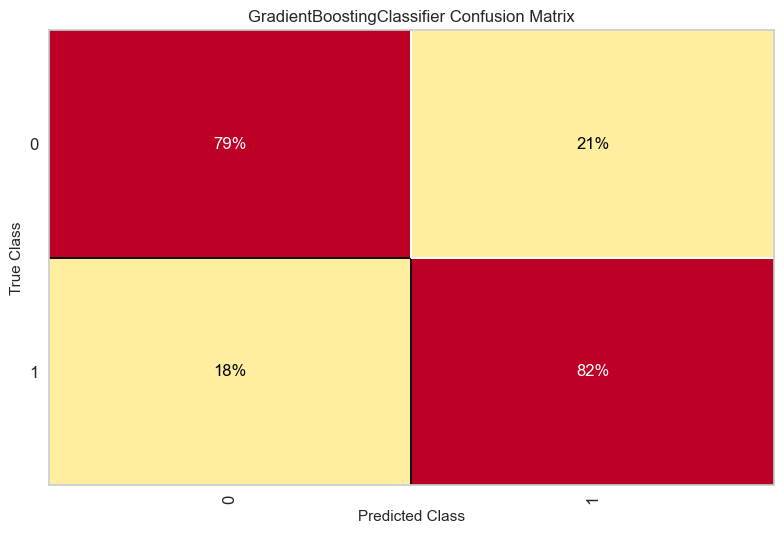

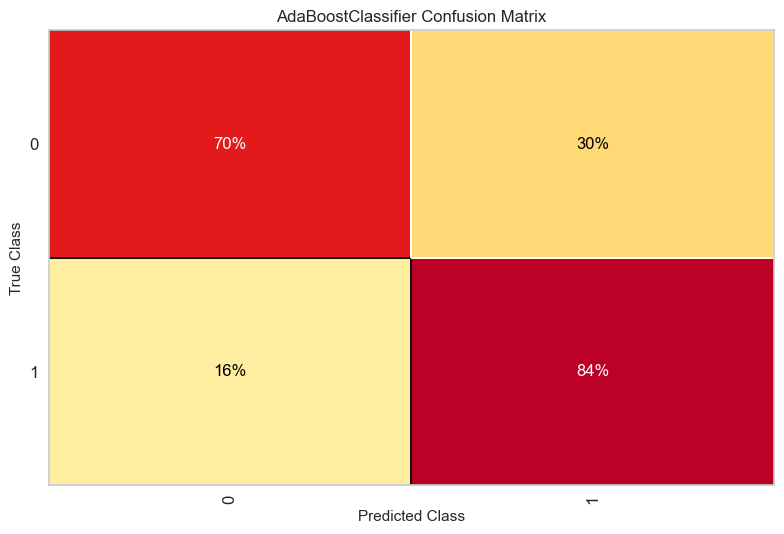

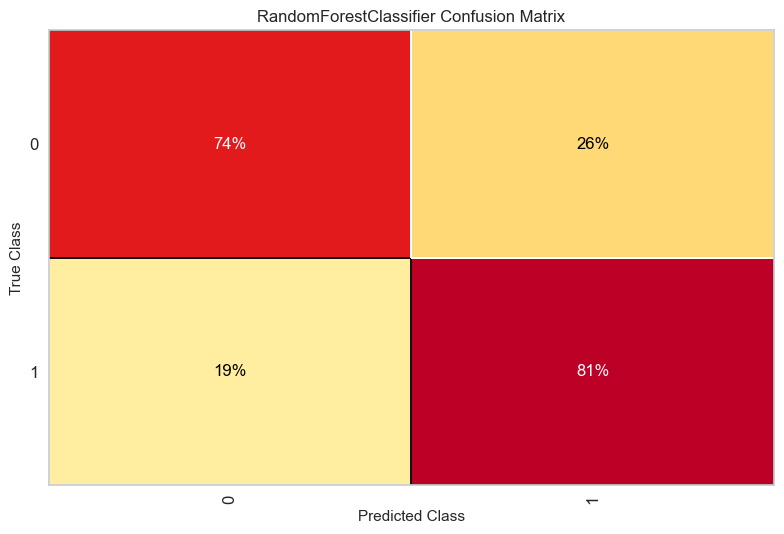

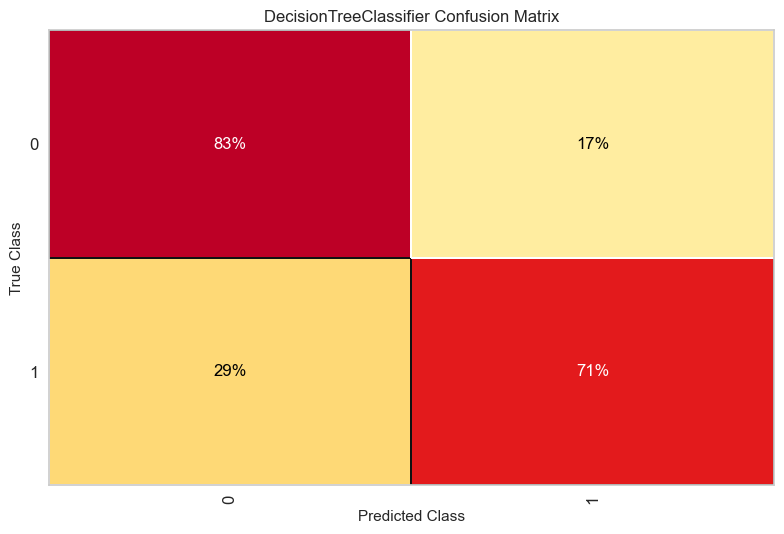

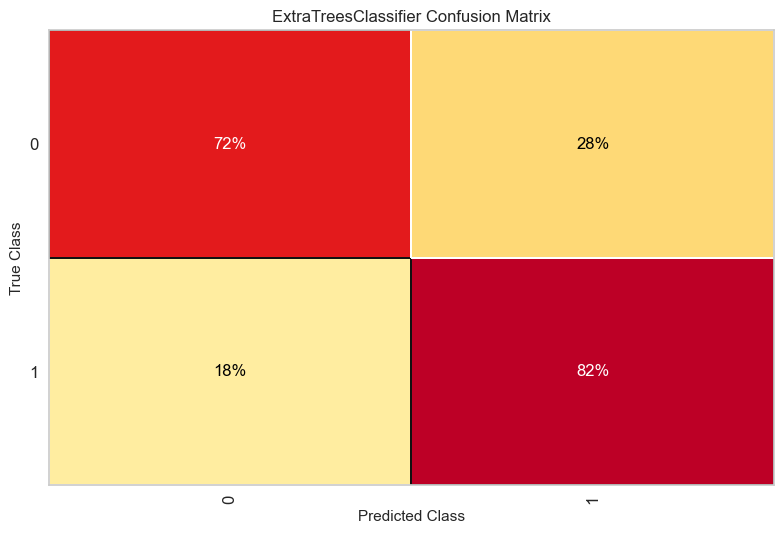

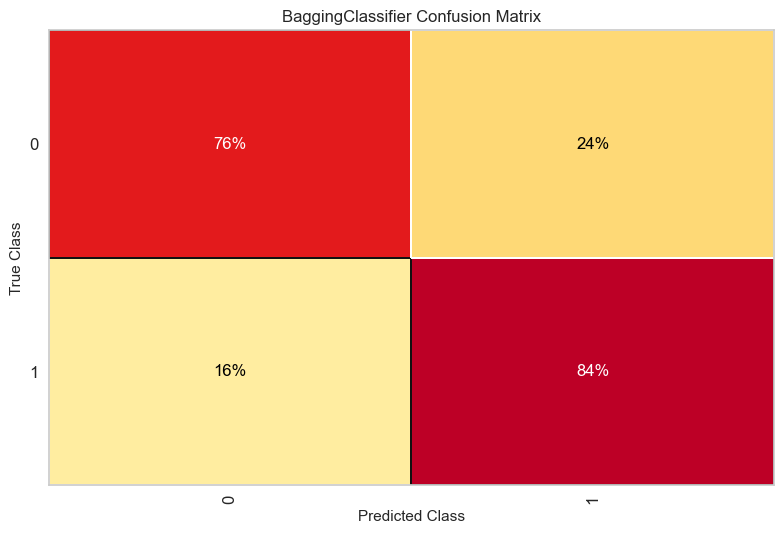

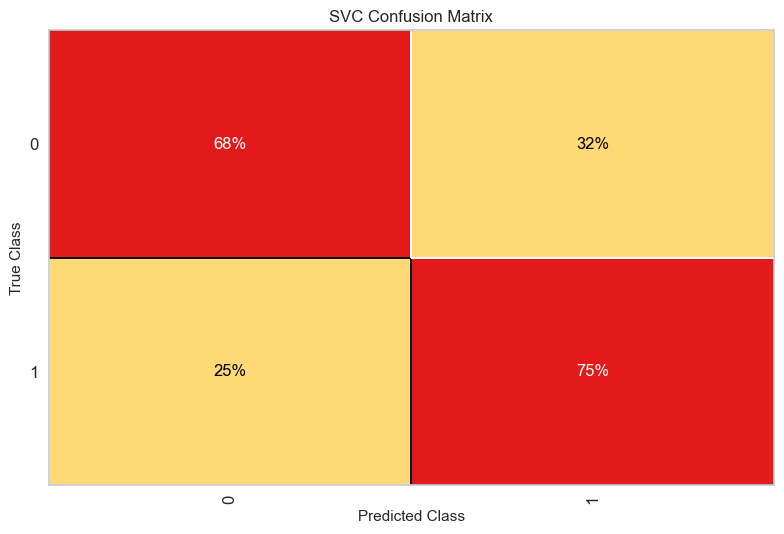

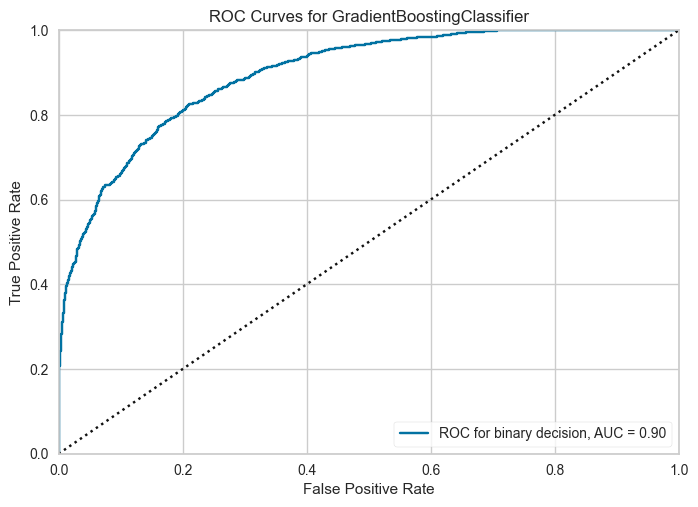

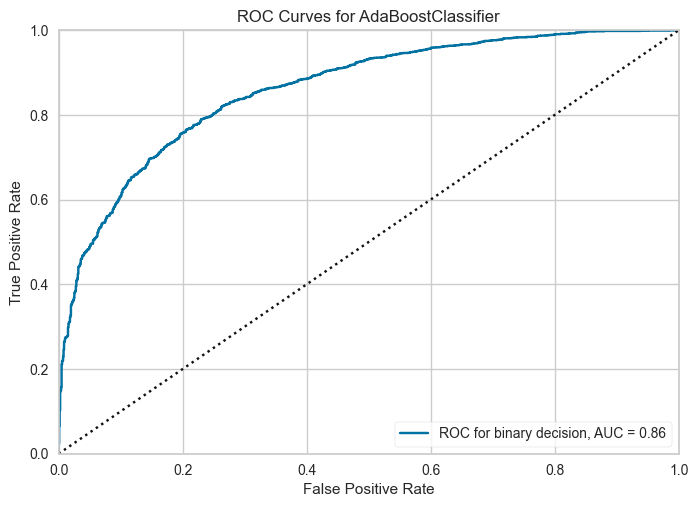

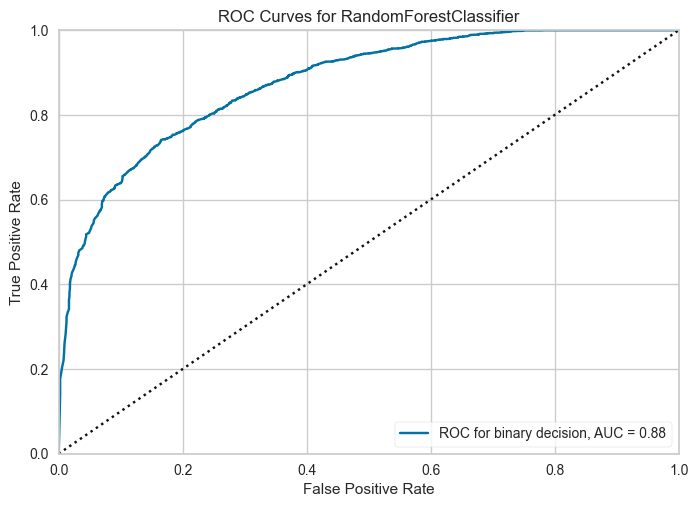

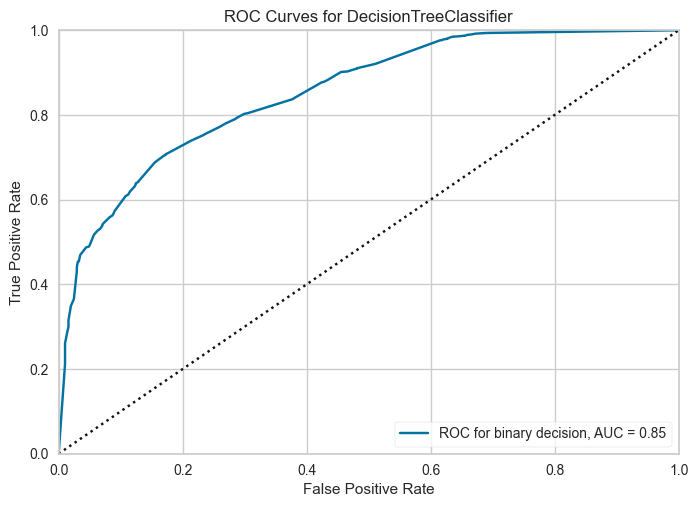

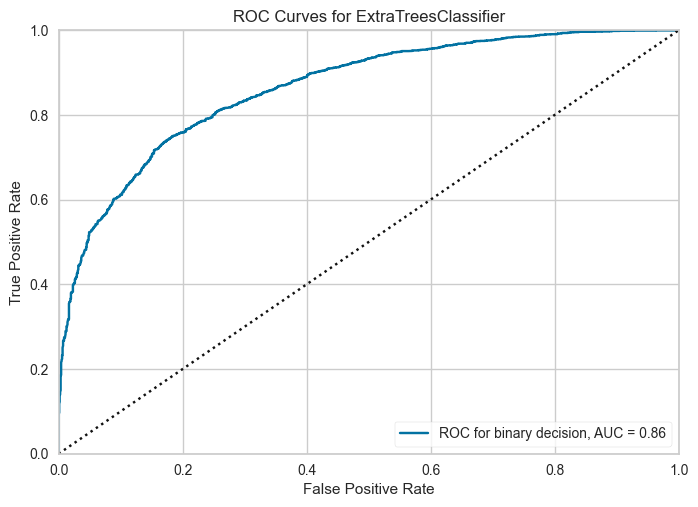

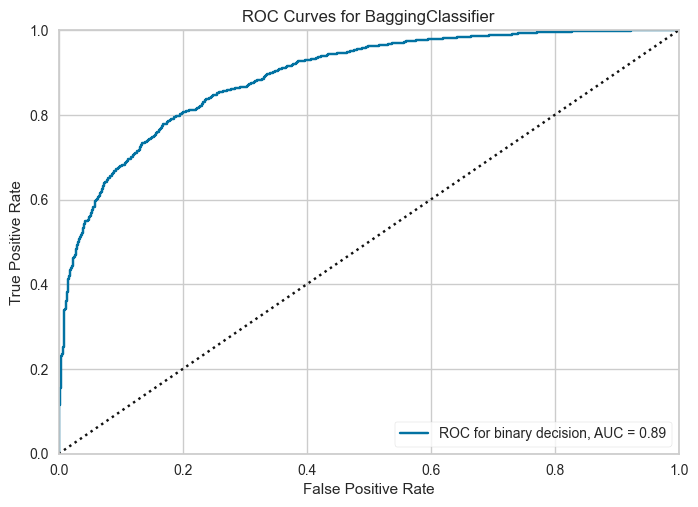

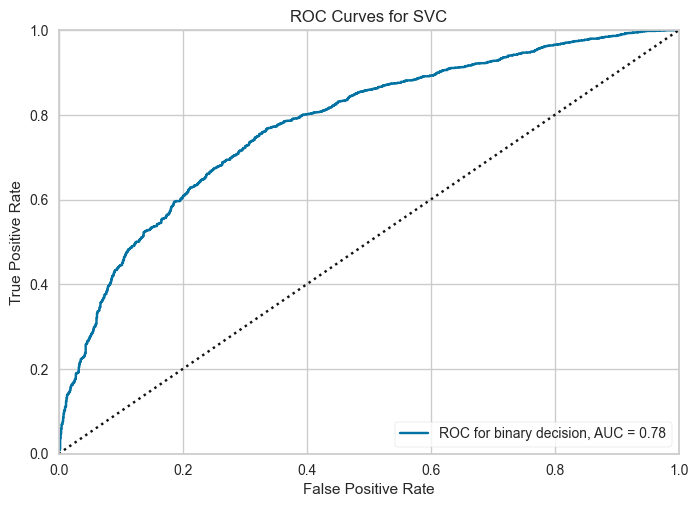

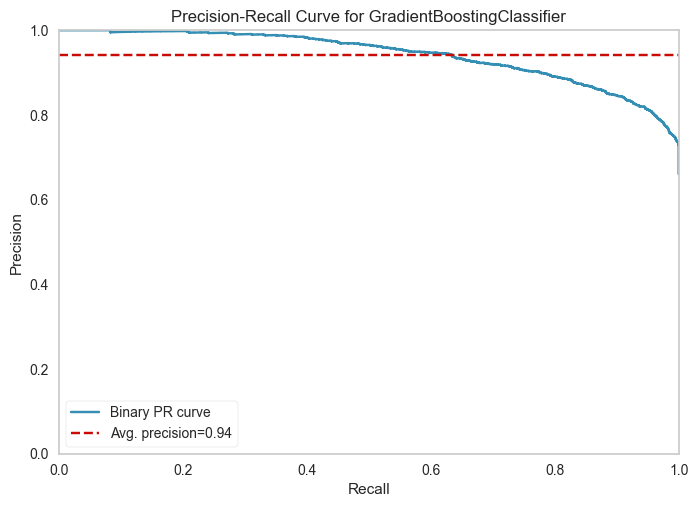

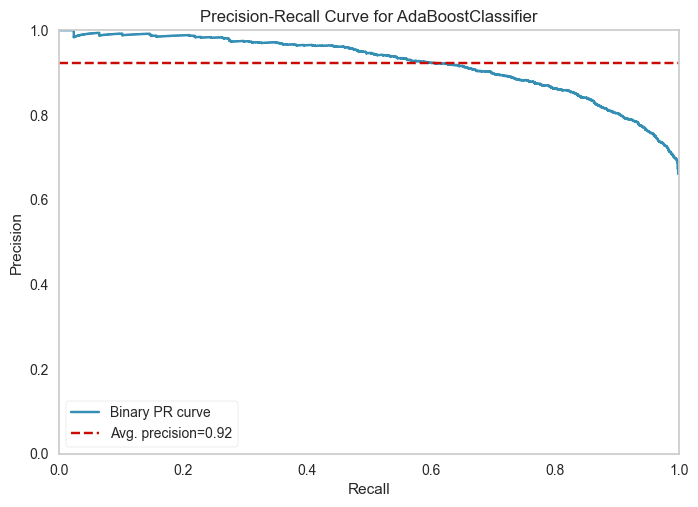

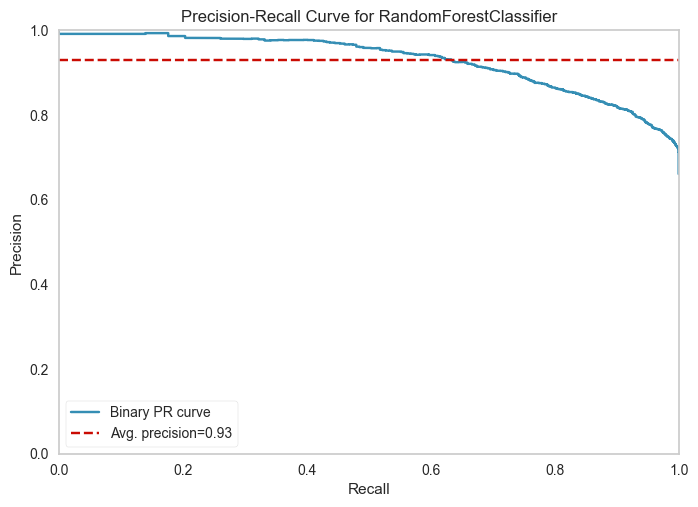

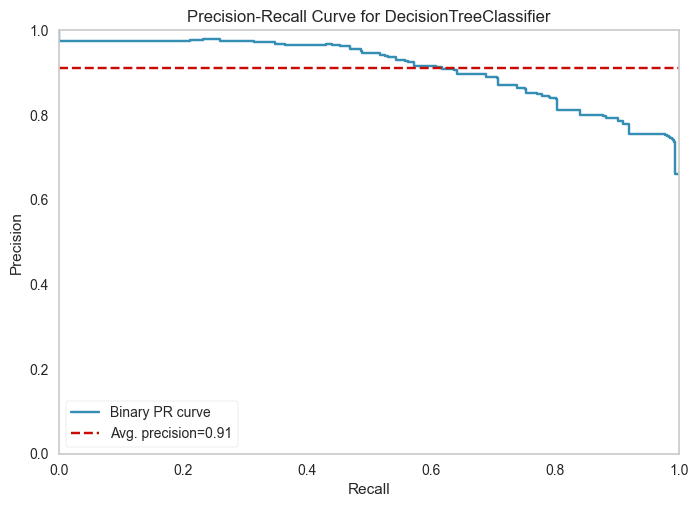

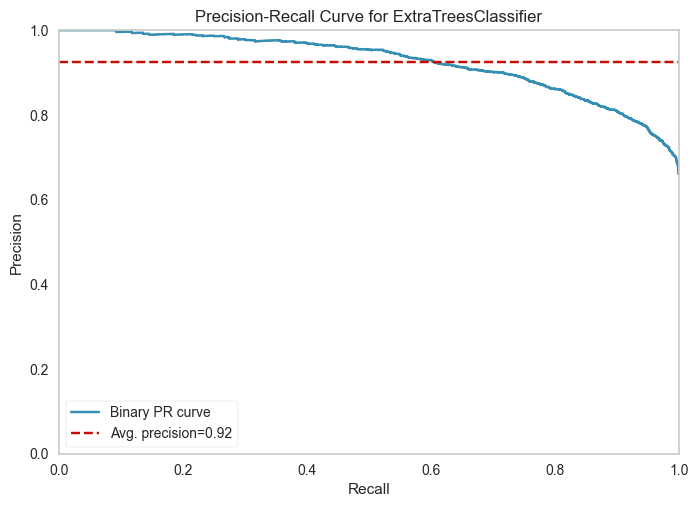

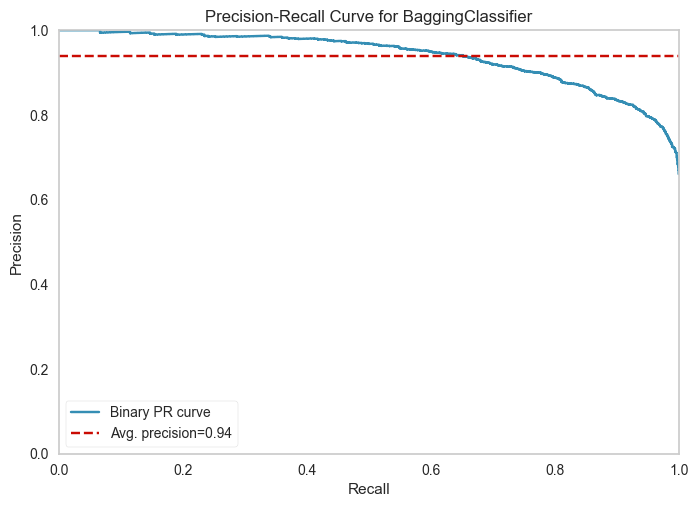

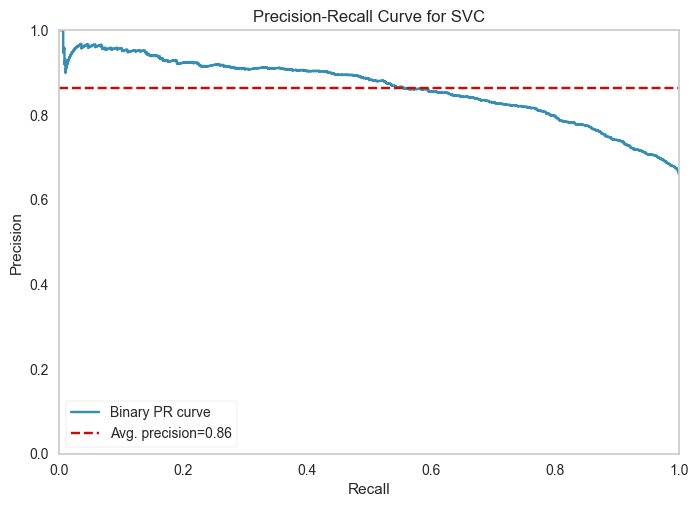

In [ ]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [ ]:
classifier_metrics()

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
accuracy_score: 0.8107
cohen_kappa_score: 0.5922
log_loss: 0.3881
zero_one_loss: 0.1893
hemming_loss: 0.1893
matthews_corrcoef: 0.5956
recall: 0.8192
f1_score: 0.8511

---------------------------------------------------------------------------------
AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5),
                   learning_rate=0.2, n_estimators=200, random_state=456)
accuracy_score: 0.7924
cohen_kappa_score: 0.5384
log_loss: 0.4497
zero_one_loss: 0.2076
hemming_loss: 0.2076
matthews_corrcoef: 0.5384
recall: 0.8396
f1_score: 0.8423

---------------------------------------------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=30, max_fe

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha=0.0 , criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=5,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME.R", learning_rate=0.2),
RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=30,min_samples_split=2,min_samples_leaf=1,max_features=None),
DecisionTreeClassifier(ccp_alpha=0.0 , criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=5,splitter="best"),
ExtraTreesClassifier(bootstrap=False, criterion= "gini",max_depth=40 , max_features=1,min_samples_leaf=1, min_samples_split=2, n_estimators=250, random_state=789),
BaggingClassifier(RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=30,min_samples_split=2,min_samples_leaf=1,max_features=None),n_estimators=200 , max_samples=0.9, max_features=0.5, bootstrap=False),
SVC(C= 10, gamma= 0.01 , kernel= "rbf", tol=0.0001), 
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']


for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

GB
Puntuación media:  0.8322684092189985
Desviación estándar:  0.008454055782614071
ABDT
Puntuación media:  0.8441275079669545
Desviación estándar:  0.006531052782067566
RF
Puntuación media:  0.8293805751895829
Desviación estándar:  0.006219350786813378
DT
Puntuación media:  0.7733839171290485
Desviación estándar:  0.006170923421981447
ET
Puntuación media:  0.8317525863933763
Desviación estándar:  0.006624259615846573
BGRF
Puntuación media:  0.8479436289692014
Desviación estándar:  0.010321858714132546
SVM
Puntuación media:  0.7761165270048147
Desviación estándar:  0.004686635939001447
